**Exercise 9.21**.  The data file named `deere3` contains 57 consecutive values from a complex machine tool process at Deere & Co.  The values given are deviations from a target value in units of ten millionths of an inch.  The process employs a control
mechanism that resets some of the parameters of the machine tool depending on the magnitude of deviation from target of the last item produced.

**(a)** Using an AR(1) model for this series, forecast the next ten values.

**(b)** Plot the series, the forecasts, and 95% forecast limits, and interpret the results.

**Solution**.

In [1]:
require(ggplot2)

Loading required package: ggplot2



In [2]:
Y <- read.csv('../data/deere3.dat')[['deere3']]


Call:
arima(x = Y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5255   124.3832
s.e.  0.1108   394.2067

sigma^2 estimated as 2069355:  log likelihood = -495.51,  aic = 997.02


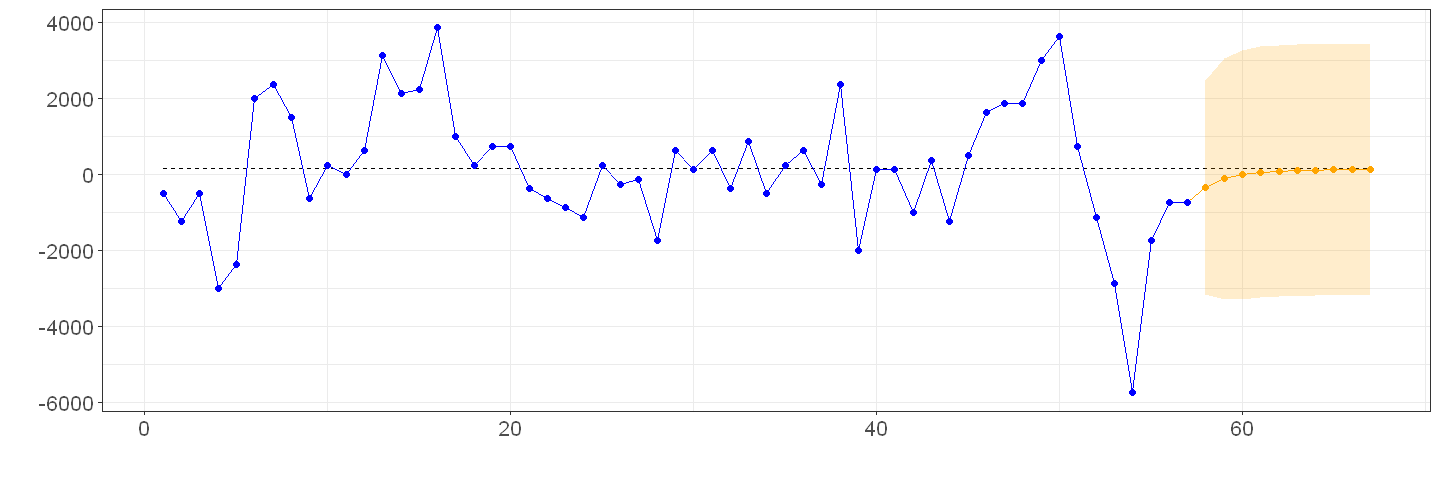

In [3]:
model = arima(Y, order=c(1, 0, 0))
print(model)

pred = predict(model, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = length(Y_pred)
n = length(Y)

# Prepend last element so line is continuous
plot_data = c(tail(Y, n=1), Y_pred)

ggplot() + 
  geom_line(aes(x=1:(m+n), y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_point(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_ribbon(aes(
      x=(n+1):(n+m), 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The predicted values quickly converge to the process mean -- raising the question on whether it would be better to just use the process mean as a model for a specific application.

**Exercise 9.22**.  The data file named `days` contains accounting data from the Winegard Co. of Burlington, Iowa.  The data are the number of days until Winegard receives payment for 130 consecutive orders from a particular distributor of Winegard products.  (The name of the distributor must remain anonymous for confidentiality reasons.)  The time series contains outliers that are quite obvious in the time series plot.  Replace each of the unusual values at "times" 63, 106, and 129 with the much
more typical value of 35 days.

**(a)** Use an MA(2) model to forecast the next ten values of this modified series.

**(b)** Plot the series, the forecasts, and 95% forecast limits, and interpret the results.

**Solution**.

In [4]:
Y <- read.csv('../data/days.dat')[['days']]
Y[c(63, 106, 129)] = 35


Call:
arima(x = Y, order = c(0, 0, 2))

Coefficients:
         ma1     ma2  intercept
      0.1893  0.1958    28.1956
s.e.  0.0894  0.0740     0.6980

sigma^2 estimated as 33.22:  log likelihood = -412.23,  aic = 832.45


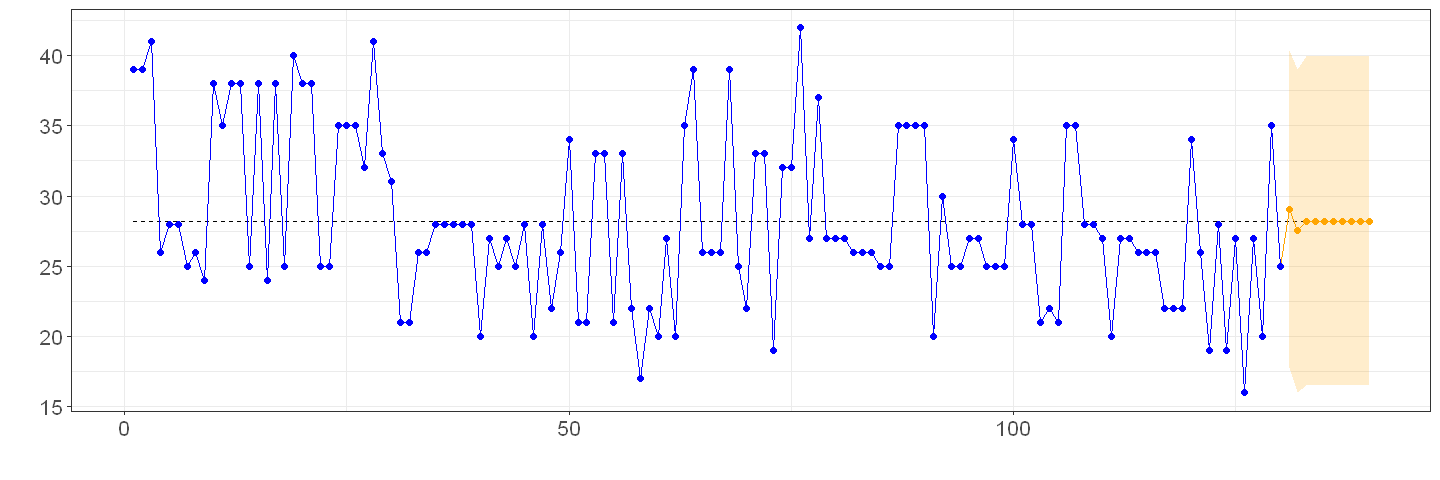

In [5]:
model = arima(Y, order=c(0, 0, 2))
print(model)

pred = predict(model, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = length(Y_pred)
n = length(Y)

# Prepend last element so line is continuous
plot_data = c(tail(Y, n=1), Y_pred)

ggplot() + 
  geom_line(aes(x=1:(m+n), y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_point(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_ribbon(aes(
      x=(n+1):(n+m), 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The MA(2) forecast are literally the mean after 2 steps in the future.

**Exercise 9.23**.  The time series in the data file `robot` gives the final position in the "x-direction" after an industrial robot has finished a planned set of exercises.  The measurements are expressed as deviations from a target position.  The robot is put through this planned set of exercises in the hope that its behavior is repeatable and thus predictable.

**(a)** Use an IMA(1,1) model to forecast five values ahead. Obtain 95% forecast limits also.

**(b)** Display the forecasts, forecast limits, and actual values in a graph and interpret the results.

**(c)** Now use an ARMA(1,1) model to forecast five values ahead and obtain 95% forecast limits.  Compare these results with those obtained in part (a).

**Solution**.

In [6]:
Y <- read.csv('../data/robot.dat')[['robot']]


Call:
arima(x = Y, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.8713
s.e.   0.0389

sigma^2 estimated as 6.069e-06:  log likelihood = 1480.95,  aic = -2957.9


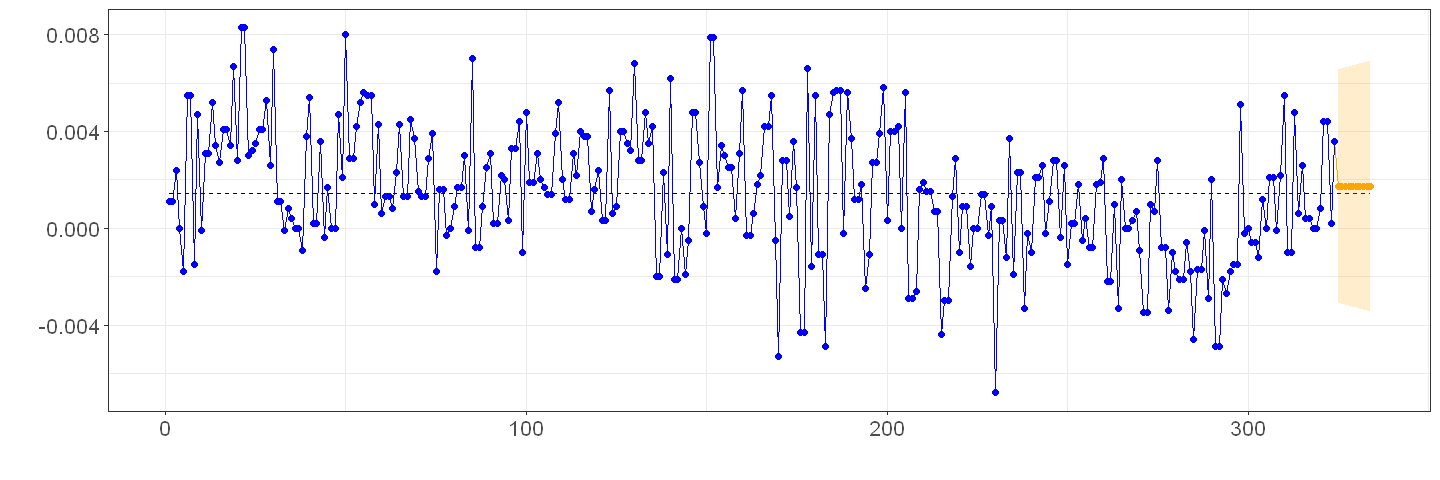

In [7]:
model.ima11 = arima(Y, order=c(0, 1, 1))
print(model.ima11)

pred = predict(model.ima11, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = length(Y_pred)
n = length(Y)

# Prepend last element so line is continuous
plot_data = c(tail(Y, n=1), Y_pred)

ggplot() + 
  geom_line(aes(x=1:(m+n), y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_point(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_ribbon(aes(
      x=(n+1):(n+m), 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))


Call:
arima(x = Y, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.9472  -0.8062     0.0015
s.e.  0.0309   0.0609     0.0005

sigma^2 estimated as 5.948e-06:  log likelihood = 1489.3,  aic = -2970.61


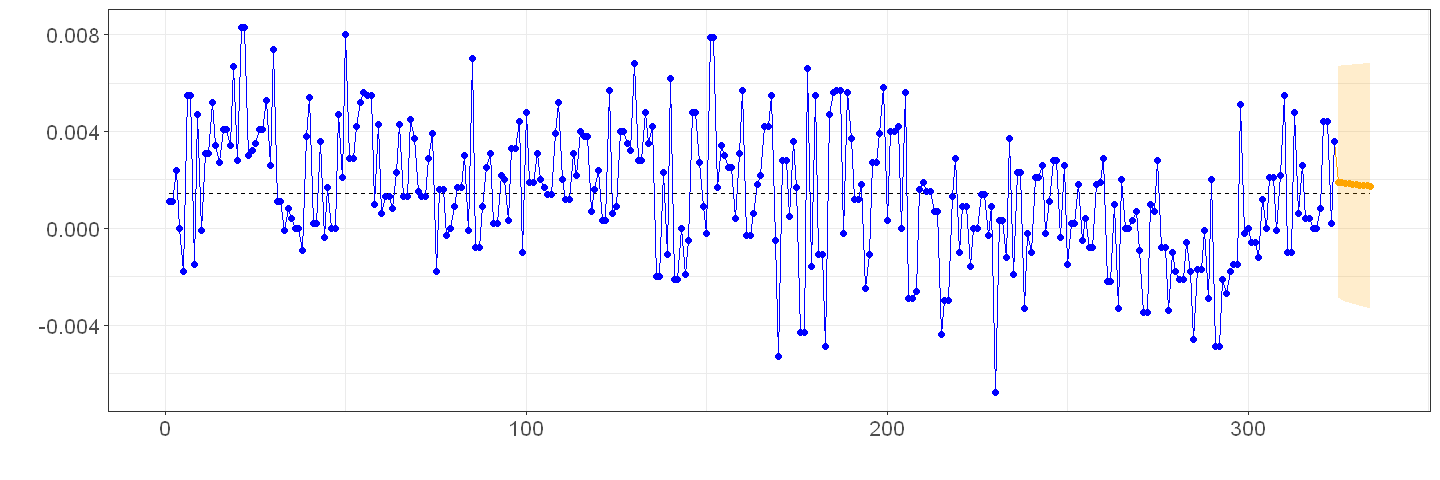

In [8]:
model.arma11 = arima(Y, order=c(1, 0, 1))
print(model.arma11)

pred = predict(model.arma11, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = length(Y_pred)
n = length(Y)

# Prepend last element so line is continuous
plot_data = c(tail(Y, n=1), Y_pred)

ggplot() + 
  geom_line(aes(x=1:(m+n), y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_point(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_ribbon(aes(
      x=(n+1):(n+m), 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Both processes provide a forecast very close to the process mean overall, though the ARMA(1, 1) model has lower AIC and higher log-likelihood.

**Exercise 9.24**.  Exhibit 9.4 on page 206 displayed the forecasts and 95% forecast limits for the square root of the Canadian hare abundance.  The data are in the file named `hare`.  Produce a similar plot in original terms.  That is, plot the original abundance values together with the squares of the forecasts and squares of the forecast limits.

**Solution**.

In [9]:
Y <- read.csv('../data/hare.dat')[['hare']]
Y <- sqrt(Y)


Call:
arima(x = Y, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      1.0519  -0.2292  -0.3931     5.6923
s.e.  0.1877   0.2942   0.1915     0.3371

sigma^2 estimated as 1.066:  log likelihood = -46.54,  aic = 103.08


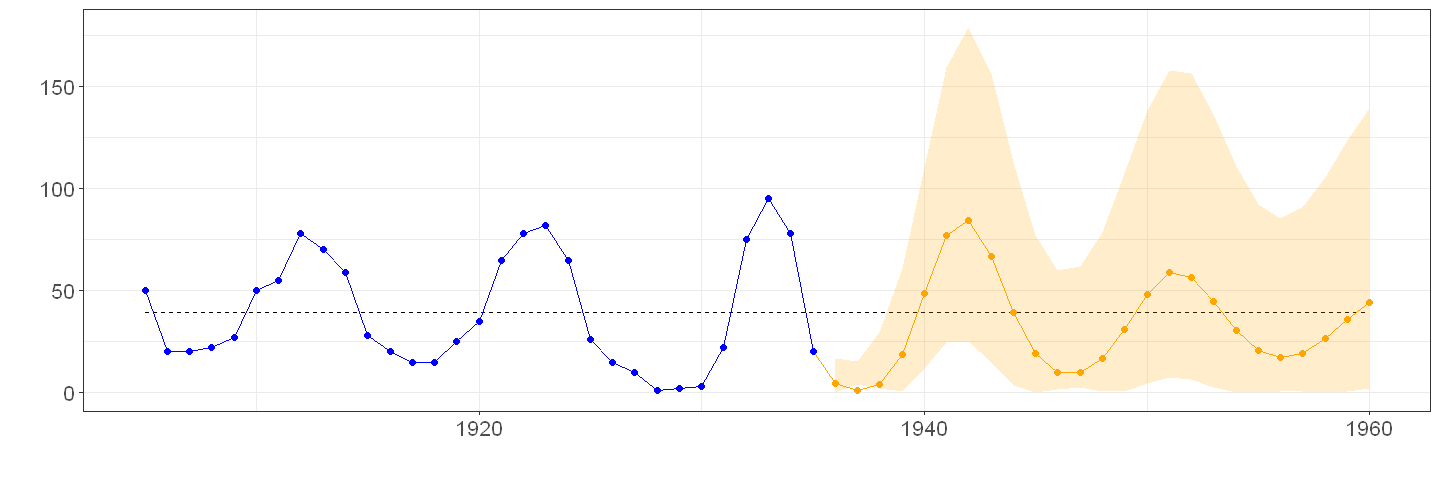

In [10]:
model = arima(Y, order=c(3, 0, 0))
print(model)

pred = predict(model, n.ahead=25, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = length(Y_pred)
n = length(Y)

start_x = 1904

# Prepend last element so line is continuous
plot_data = c(tail(Y, n=1), Y_pred)

ggplot() + 
  geom_line(aes(x=start_x+1:(m+n), y=mean(Y**2)), linetype='dashed') +
  geom_line(aes(x=start_x+n:(n+m), y=plot_data**2), color='orange') +
  geom_point(aes(x=start_x+n:(n+m), y=plot_data**2), color='orange') +
  geom_line(aes(x=start_x+1:n, y=c(Y)**2), color='blue') +
  geom_point(aes(x=start_x+1:n, y=c(Y)**2), color='blue') +
  geom_ribbon(aes(
      x=start_x+(n+1):(n+m), 
      ymin=(Y_pred - z * se)**2, 
      ymax=(Y_pred + z * se)**2
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The squared plot presents confidence intervals that are obviously imbalanced, as the recursion was performed on the square root of the values.

**Exercise 9.25**.  Consider the seasonal means plus linear time trend model for the logarithms of the monthly electricity generation time series in Exercise 9.8.  (The data are in the file named `electricity`.)

**(a)** Find the two-year forecasts and forecast limits in original terms.  That is, exponentiate (antilog) the results obtained in Exercise 9.8.

**(b)** Plot the last five years of the original time series together with two years of forecasts and the 95% forecast limits, all in original terms.  Interpret the plot.

**Solution**.

In [11]:
require(ggplot2)
require(zoo)
require(data.table)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: data.table



In [12]:
data <- read.table("../data/electricity.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1973-01"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))


Call:
lm(formula = log(electricity) ~ t + month, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.096274 -0.029189  0.000315  0.025507  0.134976 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.783e+01  4.283e-01 -88.323  < 2e-16 ***
t            2.526e-02  2.153e-04 117.310  < 2e-16 ***
month02     -1.246e-01  1.004e-02 -12.408  < 2e-16 ***
month03     -9.080e-02  1.004e-02  -9.040  < 2e-16 ***
month04     -1.642e-01  1.004e-02 -16.344  < 2e-16 ***
month05     -1.000e-01  1.004e-02  -9.959  < 2e-16 ***
month06     -2.016e-02  1.004e-02  -2.007   0.0455 *  
month07      7.675e-02  1.004e-02   7.641 1.75e-13 ***
month08      7.368e-02  1.004e-02   7.335 1.33e-12 ***
month09     -6.473e-02  1.004e-02  -6.444 3.49e-10 ***
month10     -1.148e-01  1.005e-02 -11.431  < 2e-16 ***
month11     -1.346e-01  1.005e-02 -13.400  < 2e-16 ***
month12     -4.481e-02  1.005e-02  -4.460 1.08e-05 ***
---
Signif. codes:  0 '***' 0.001 '**'

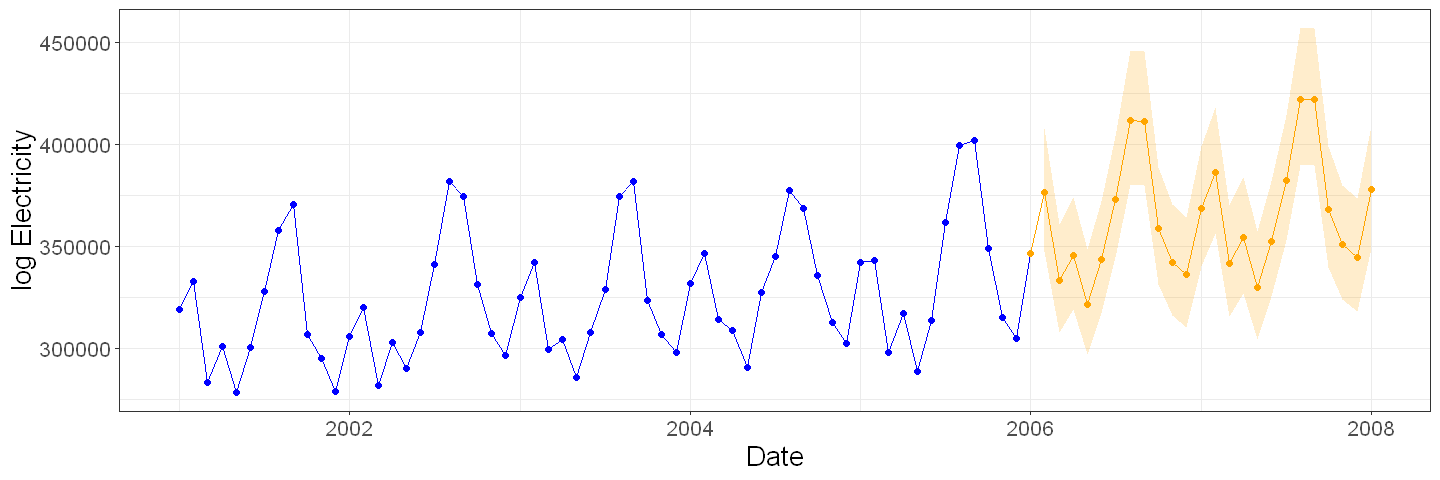

In [13]:
model = lm(log(electricity)~ t + month, data=data)
summary(model)

sigma_e = summary(model)$sigma
z = qnorm(0.975)

t = time(zooreg(1:(2*12), as.yearmon("2006-01"), freq = 12))
new_data = data.table(
    'date' = t,
    't' = as.numeric(format(t, "%Y")) + as.numeric(format(t, "%m"))/12,
    'month' = as.factor(format(t, "%m"))
)
new_data[, 'electricity' := exp(predict.lm(model, new_data))]

options(repr.plot.width=12, repr.plot.height=4)

index = data['t'] >= 2001

# Prepend last element so line is continuous
plot_data = rbind(last(data), new_data)

ggplot() + 
  geom_line(aes(x=data[['t']][index], y=data[['electricity']][index]), color='blue') +
  geom_point(aes(x=data[['t']][index], y=data[['electricity']][index]), color='blue') +
  geom_line(aes(x=plot_data[['t']], y=plot_data[['electricity']]), color='orange') +
  geom_point(aes(x=plot_data[['t']], y=plot_data[['electricity']]), color='orange') +
  geom_ribbon(aes(
      x=new_data[['t']], 
      ymin=exp(log(new_data[['electricity']]) - z * sigma_e), 
      ymax=exp(log(new_data[['electricity']]) + z * sigma_e)
  ), fill='orange', alpha=0.2) + 
  xlab('Date') + ylab('log Electricity') +
  theme_bw() + theme(text = element_text(size=16))

Results are very similar to the ones in exercise 9.8 -- the log / exponentiation does not make much of an impact visually for sufficiently large values that change over a small range.